In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.0005
num_in = 784
num_h = 5
num_out = 784
num_epochs = 1200
img_size = [28,28]
stride = 2
batch_size = 100

In [5]:
x = tf.placeholder(tf.float32, [None,num_in])

In [6]:
rho = tf.fill([1,num_h], 0.05)

In [7]:
weights = {
    'in':tf.Variable(tf.random_normal([num_in, num_h])),
    'h':tf.Variable(tf.random_normal([num_h, num_out]))
}

biases = {
    'in':tf.Variable(tf.random_normal([1,num_h])),
    'h':tf.Variable(tf.random_normal([1,num_out]))
}

In [8]:
h_layer = tf.add(tf.matmul(x, weights['in']), biases['in'])
h_layer = tf.nn.sigmoid(h_layer)
out_layer = tf.add(tf.matmul(h_layer, weights['h']), biases['h'])

In [9]:
rho_cap = tf.Variable(tf.zeros([1, num_h]))
rho_cap = rho_cap + h_layer/mnist.train.num_examples

In [10]:
loss_op = tf.losses.mean_squared_error(out_layer, x)

In [11]:
#optimizer = tf.train.AdamOptimizer(learning_rate)

In [12]:
#train_op = optimizer.minimize(loss_op)

In [13]:
ones = tf.Variable(tf.ones([1,num_h]))

In [14]:
kl_loss = tf.multiply(rho, tf.log(tf.div(rho, rho_cap))) + tf.multiply((ones-rho), tf.log(tf.div(ones-rho, ones-rho_cap)))

In [15]:
loss_op1 = tf.reduce_mean(kl_loss)

In [16]:
loss_op2 = loss_op1 + loss_op

In [17]:
optimizer1= tf.train.AdamOptimizer(5e-6)

In [18]:
train_op1 = optimizer1.minimize(loss_op2)

In [19]:
init = tf.global_variables_initializer()

In [20]:
saver = tf.train.Saver()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:mnist.train.images})
        print('after '+str(epoch+1)+' epochs '+'error cost is '+str(cost)+','+'sparse encoding cost is '+str(cost1))
    save_path = saver.save(sess, '/tmp/sparse_encoder0.1.ckpt')

after 1 epochs error cost is 4.162842,sparse encoding cost is 0.4419158
after 2 epochs error cost is 4.1626544,sparse encoding cost is 0.35974628
after 3 epochs error cost is 4.162467,sparse encoding cost is 0.34736925
after 4 epochs error cost is 4.162279,sparse encoding cost is 0.34000817
after 5 epochs error cost is 4.1620903,sparse encoding cost is 0.3348657
after 6 epochs error cost is 4.1619024,sparse encoding cost is 0.3308776
after 7 epochs error cost is 4.161714,sparse encoding cost is 0.32776898
after 8 epochs error cost is 4.1615252,sparse encoding cost is 0.32519352
after 9 epochs error cost is 4.1613374,sparse encoding cost is 0.32299006
after 10 epochs error cost is 4.161152,sparse encoding cost is 0.32121265
after 11 epochs error cost is 4.1609654,sparse encoding cost is 0.31959727
after 12 epochs error cost is 4.160777,sparse encoding cost is 0.31824526
after 13 epochs error cost is 4.16059,sparse encoding cost is 0.31705332
after 14 epochs error cost is 4.160403,sparse

after 112 epochs error cost is 4.1420555,sparse encoding cost is 0.30666044
after 113 epochs error cost is 4.1418657,sparse encoding cost is 0.30666023
after 114 epochs error cost is 4.14168,sparse encoding cost is 0.30666015
after 115 epochs error cost is 4.1414914,sparse encoding cost is 0.30665994
after 116 epochs error cost is 4.1413045,sparse encoding cost is 0.30665967
after 117 epochs error cost is 4.141117,sparse encoding cost is 0.30665955
after 118 epochs error cost is 4.1409307,sparse encoding cost is 0.3066593
after 119 epochs error cost is 4.1407437,sparse encoding cost is 0.30665925
after 120 epochs error cost is 4.140557,sparse encoding cost is 0.30665916
after 121 epochs error cost is 4.14037,sparse encoding cost is 0.30665907
after 122 epochs error cost is 4.140184,sparse encoding cost is 0.306659
after 123 epochs error cost is 4.1399994,sparse encoding cost is 0.30665788
after 124 epochs error cost is 4.139811,sparse encoding cost is 0.30665526
after 125 epochs error 

after 222 epochs error cost is 4.1215734,sparse encoding cost is 0.30656868
after 223 epochs error cost is 4.1213894,sparse encoding cost is 0.3065684
after 224 epochs error cost is 4.121204,sparse encoding cost is 0.30656737
after 225 epochs error cost is 4.1210184,sparse encoding cost is 0.30656108
after 226 epochs error cost is 4.1208344,sparse encoding cost is 0.30656052
after 227 epochs error cost is 4.120651,sparse encoding cost is 0.30656
after 228 epochs error cost is 4.1204653,sparse encoding cost is 0.30655962
after 229 epochs error cost is 4.12028,sparse encoding cost is 0.30655932
after 230 epochs error cost is 4.120095,sparse encoding cost is 0.30655882
after 231 epochs error cost is 4.119908,sparse encoding cost is 0.30655852
after 232 epochs error cost is 4.1197224,sparse encoding cost is 0.30655813
after 233 epochs error cost is 4.119537,sparse encoding cost is 0.3065577
after 234 epochs error cost is 4.119351,sparse encoding cost is 0.30655733
after 235 epochs error co

after 332 epochs error cost is 4.101199,sparse encoding cost is 0.30641866
after 333 epochs error cost is 4.101014,sparse encoding cost is 0.306418
after 334 epochs error cost is 4.1008296,sparse encoding cost is 0.30641723
after 335 epochs error cost is 4.100645,sparse encoding cost is 0.30641568
after 336 epochs error cost is 4.100461,sparse encoding cost is 0.30641502
after 337 epochs error cost is 4.100277,sparse encoding cost is 0.30641448
after 338 epochs error cost is 4.1000924,sparse encoding cost is 0.30641404
after 339 epochs error cost is 4.099908,sparse encoding cost is 0.30641353
after 340 epochs error cost is 4.0997243,sparse encoding cost is 0.3064129
after 341 epochs error cost is 4.099541,sparse encoding cost is 0.30641204
after 342 epochs error cost is 4.099358,sparse encoding cost is 0.3064115
after 343 epochs error cost is 4.099173,sparse encoding cost is 0.30641097
after 344 epochs error cost is 4.0989885,sparse encoding cost is 0.30641034
after 345 epochs error co

after 442 epochs error cost is 4.080924,sparse encoding cost is 0.30628547
after 443 epochs error cost is 4.0807385,sparse encoding cost is 0.30628476
after 444 epochs error cost is 4.0805564,sparse encoding cost is 0.30628392
after 445 epochs error cost is 4.080372,sparse encoding cost is 0.30628315
after 446 epochs error cost is 4.0801883,sparse encoding cost is 0.3062824
after 447 epochs error cost is 4.080003,sparse encoding cost is 0.30628094
after 448 epochs error cost is 4.0798197,sparse encoding cost is 0.30628005
after 449 epochs error cost is 4.0796366,sparse encoding cost is 0.30627874
after 450 epochs error cost is 4.0794544,sparse encoding cost is 0.30627757
after 451 epochs error cost is 4.0792713,sparse encoding cost is 0.30627683
after 452 epochs error cost is 4.079087,sparse encoding cost is 0.30627626
after 453 epochs error cost is 4.078905,sparse encoding cost is 0.3062757
after 454 epochs error cost is 4.0787215,sparse encoding cost is 0.306275
after 455 epochs erro

after 551 epochs error cost is 4.0609426,sparse encoding cost is 0.30607125
after 552 epochs error cost is 4.06076,sparse encoding cost is 0.30606905
after 553 epochs error cost is 4.0605755,sparse encoding cost is 0.30606818
after 554 epochs error cost is 4.0603924,sparse encoding cost is 0.30605793
after 555 epochs error cost is 4.0602093,sparse encoding cost is 0.30605295
after 556 epochs error cost is 4.0600257,sparse encoding cost is 0.30605048
after 557 epochs error cost is 4.059842,sparse encoding cost is 0.3060488
after 558 epochs error cost is 4.0596595,sparse encoding cost is 0.30604723
after 559 epochs error cost is 4.059475,sparse encoding cost is 0.30604604
after 560 epochs error cost is 4.059292,sparse encoding cost is 0.30604497
after 561 epochs error cost is 4.0591087,sparse encoding cost is 0.30604365
after 562 epochs error cost is 4.058926,sparse encoding cost is 0.30604193
after 563 epochs error cost is 4.058742,sparse encoding cost is 0.30604085
after 564 epochs err

after 660 epochs error cost is 4.04101,sparse encoding cost is 0.30584154
after 661 epochs error cost is 4.0408273,sparse encoding cost is 0.30583984
after 662 epochs error cost is 4.040645,sparse encoding cost is 0.30583856
after 663 epochs error cost is 4.040465,sparse encoding cost is 0.30583742
after 664 epochs error cost is 4.0402827,sparse encoding cost is 0.30583623
after 665 epochs error cost is 4.0401006,sparse encoding cost is 0.30583507
after 666 epochs error cost is 4.03992,sparse encoding cost is 0.30583423
after 667 epochs error cost is 4.0397363,sparse encoding cost is 0.30583274
after 668 epochs error cost is 4.0395546,sparse encoding cost is 0.30583176
after 669 epochs error cost is 4.039371,sparse encoding cost is 0.30583087
after 670 epochs error cost is 4.0391865,sparse encoding cost is 0.30582994
after 671 epochs error cost is 4.039006,sparse encoding cost is 0.3058288
after 672 epochs error cost is 4.0388255,sparse encoding cost is 0.30582744
after 673 epochs erro

after 770 epochs error cost is 4.0210285,sparse encoding cost is 0.3056016
after 771 epochs error cost is 4.020846,sparse encoding cost is 0.30560067
after 772 epochs error cost is 4.0206647,sparse encoding cost is 0.3055967
after 773 epochs error cost is 4.020481,sparse encoding cost is 0.3055951
after 774 epochs error cost is 4.020302,sparse encoding cost is 0.30559382
after 775 epochs error cost is 4.0201225,sparse encoding cost is 0.30559266
after 776 epochs error cost is 4.019942,sparse encoding cost is 0.30559
after 777 epochs error cost is 4.0197635,sparse encoding cost is 0.30558893
after 778 epochs error cost is 4.0195823,sparse encoding cost is 0.3055879
after 779 epochs error cost is 4.019401,sparse encoding cost is 0.305586
after 780 epochs error cost is 4.019218,sparse encoding cost is 0.3055846
after 781 epochs error cost is 4.0190377,sparse encoding cost is 0.30558294
after 782 epochs error cost is 4.018858,sparse encoding cost is 0.30558172
after 783 epochs error cost i

after 880 epochs error cost is 4.0011015,sparse encoding cost is 0.30530697
after 881 epochs error cost is 4.000922,sparse encoding cost is 0.3053052
after 882 epochs error cost is 4.0007405,sparse encoding cost is 0.30530387
after 883 epochs error cost is 4.0005603,sparse encoding cost is 0.30530277
after 884 epochs error cost is 4.0003786,sparse encoding cost is 0.30530062
after 885 epochs error cost is 4.0001984,sparse encoding cost is 0.30529898
after 886 epochs error cost is 4.0000167,sparse encoding cost is 0.30529773
after 887 epochs error cost is 3.9998338,sparse encoding cost is 0.30529514
after 888 epochs error cost is 3.9996533,sparse encoding cost is 0.30529356
after 889 epochs error cost is 3.9994712,sparse encoding cost is 0.30529246
after 890 epochs error cost is 3.999291,sparse encoding cost is 0.30528077
after 891 epochs error cost is 3.9991097,sparse encoding cost is 0.30527648
after 892 epochs error cost is 3.998929,sparse encoding cost is 0.30527413
after 893 epochs

after 989 epochs error cost is 3.9814363,sparse encoding cost is 0.30504155
after 990 epochs error cost is 3.9812572,sparse encoding cost is 0.30502948
after 991 epochs error cost is 3.981076,sparse encoding cost is 0.30502456
after 992 epochs error cost is 3.980897,sparse encoding cost is 0.30502167
after 993 epochs error cost is 3.9807155,sparse encoding cost is 0.3050194
after 994 epochs error cost is 3.9805336,sparse encoding cost is 0.30501768
after 995 epochs error cost is 3.980354,sparse encoding cost is 0.3050162
after 996 epochs error cost is 3.9801729,sparse encoding cost is 0.30501413
after 997 epochs error cost is 3.9799912,sparse encoding cost is 0.30501273
after 998 epochs error cost is 3.979812,sparse encoding cost is 0.30501106
after 999 epochs error cost is 3.9796298,sparse encoding cost is 0.3050096
after 1000 epochs error cost is 3.979451,sparse encoding cost is 0.30500835
after 1001 epochs error cost is 3.979272,sparse encoding cost is 0.30500707
after 1002 epochs e

after 1097 epochs error cost is 3.962021,sparse encoding cost is 0.30471626
after 1098 epochs error cost is 3.9618416,sparse encoding cost is 0.30471182
after 1099 epochs error cost is 3.9616616,sparse encoding cost is 0.30470902
after 1100 epochs error cost is 3.9614816,sparse encoding cost is 0.30470747
after 1101 epochs error cost is 3.9613032,sparse encoding cost is 0.30470598
after 1102 epochs error cost is 3.961124,sparse encoding cost is 0.3047046
after 1103 epochs error cost is 3.9609447,sparse encoding cost is 0.30470347
after 1104 epochs error cost is 3.9607666,sparse encoding cost is 0.30470142
after 1105 epochs error cost is 3.9605858,sparse encoding cost is 0.30470002
after 1106 epochs error cost is 3.9604077,sparse encoding cost is 0.30469874
after 1107 epochs error cost is 3.960229,sparse encoding cost is 0.3046969
after 1108 epochs error cost is 3.960049,sparse encoding cost is 0.30469564
after 1109 epochs error cost is 3.9598694,sparse encoding cost is 0.30469462
after

In [22]:
mnist.train.num_examples

55000

In [23]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/model.ckpt')
    fig, axes = plt.subplots(5,1)
    for i,ax in enumerate(axes.flat):
        print(i)
        template = tf.transpose(weights['in'][:,i])
        template = template.eval()
        template = template/np.max(template)
        template = template.reshape((28,28))
        ax.imshow(template, cmap = 'binary')
        #plt.show()

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


NotFoundError: Key Variable/Adam not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op u'save/RestoreV2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/hari/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/hari/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/home/hari/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/home/hari/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/hari/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/home/hari/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/hari/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/hari/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/hari/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/hari/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/hari/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/hari/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/hari/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-416a2593f909>", line 1, in <module>
    saver = tf.train.Saver()
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1293, in __init__
    self.build()
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1302, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1339, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 796, in _build_internal
    restore_sequentially, reshape)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 449, in _AddRestoreOps
    restore_sequentially)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 847, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1030, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/home/hari/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key Variable/Adam not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder0.1.ckpt


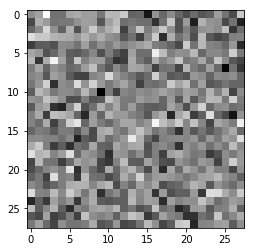

In [27]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder0.1.ckpt')
    template = tf.transpose(weights['in'][:,3])
    template = template.eval()
    template = template/np.max(template)
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [28]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder0.1.ckpt')
    
    for epoch in range(num_epochs):
        _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:mnist.train.images})
        print('after '+str(epoch+1200)+' epochs '+'error cost is '+str(cost)+','+'sparse encoding cost is '+str(cost1))
    save_path = saver.save(sess, '/tmp/sparse_encoder0.2.ckpt')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder0.1.ckpt
after 1200 epochs error cost is 3.9434266,sparse encoding cost is 0.30440533
after 1201 epochs error cost is 3.9432456,sparse encoding cost is 0.3044036
after 1202 epochs error cost is 3.943067,sparse encoding cost is 0.3043872
after 1203 epochs error cost is 3.9428875,sparse encoding cost is 0.30438352
after 1204 epochs error cost is 3.9427094,sparse encoding cost is 0.304379
after 1205 epochs error cost is 3.9425325,sparse encoding cost is 0.3043766
after 1206 epochs error cost is 3.9423525,sparse encoding cost is 0.3043745
after 1207 epochs error cost is 3.942173,sparse encoding cost is 0.30437186
after 1208 epochs error cost is 3.9419944,sparse encoding cost is 0.30436957
after 1209 epochs error cost is 3.9418151,sparse encoding cost is 0.30436718
after 1210 epochs error cost is 3.9416363,sparse encoding cost is 0.3043654
after 1211 epochs error cost is 3.9414575,sparse encoding cost is 0.30436385
after 1212 epoc

after 1307 epochs error cost is 3.9243577,sparse encoding cost is 0.30407956
after 1308 epochs error cost is 3.92418,sparse encoding cost is 0.3040777
after 1309 epochs error cost is 3.924002,sparse encoding cost is 0.30407533
after 1310 epochs error cost is 3.923824,sparse encoding cost is 0.30407387
after 1311 epochs error cost is 3.9236472,sparse encoding cost is 0.30407238
after 1312 epochs error cost is 3.92347,sparse encoding cost is 0.30407098
after 1313 epochs error cost is 3.9232936,sparse encoding cost is 0.30406806
after 1314 epochs error cost is 3.9231145,sparse encoding cost is 0.30405632
after 1315 epochs error cost is 3.9229362,sparse encoding cost is 0.3040513
after 1316 epochs error cost is 3.922758,sparse encoding cost is 0.3040486
after 1317 epochs error cost is 3.9225795,sparse encoding cost is 0.30404603
after 1318 epochs error cost is 3.9224007,sparse encoding cost is 0.3040436
after 1319 epochs error cost is 3.9222238,sparse encoding cost is 0.30404186
after 1320

after 1415 epochs error cost is 3.905162,sparse encoding cost is 0.30369648
after 1416 epochs error cost is 3.9049838,sparse encoding cost is 0.30369428
after 1417 epochs error cost is 3.9048064,sparse encoding cost is 0.30369097
after 1418 epochs error cost is 3.9046304,sparse encoding cost is 0.3036892
after 1419 epochs error cost is 3.9044528,sparse encoding cost is 0.3036867
after 1420 epochs error cost is 3.9042761,sparse encoding cost is 0.30368474
after 1421 epochs error cost is 3.904099,sparse encoding cost is 0.30368283
after 1422 epochs error cost is 3.9039226,sparse encoding cost is 0.30368063
after 1423 epochs error cost is 3.9037454,sparse encoding cost is 0.3036787
after 1424 epochs error cost is 3.9035673,sparse encoding cost is 0.30367646
after 1425 epochs error cost is 3.9033906,sparse encoding cost is 0.30367473
after 1426 epochs error cost is 3.9032142,sparse encoding cost is 0.30367324
after 1427 epochs error cost is 3.9030364,sparse encoding cost is 0.30366564
afte

after 1523 epochs error cost is 3.886039,sparse encoding cost is 0.30337682
after 1524 epochs error cost is 3.8858619,sparse encoding cost is 0.30337518
after 1525 epochs error cost is 3.8856843,sparse encoding cost is 0.30337358
after 1526 epochs error cost is 3.8855088,sparse encoding cost is 0.30337146
after 1527 epochs error cost is 3.885332,sparse encoding cost is 0.30334306
after 1528 epochs error cost is 3.8851554,sparse encoding cost is 0.30334
after 1529 epochs error cost is 3.8849788,sparse encoding cost is 0.30333728
after 1530 epochs error cost is 3.8848026,sparse encoding cost is 0.30333444
after 1531 epochs error cost is 3.8846264,sparse encoding cost is 0.30333233
after 1532 epochs error cost is 3.8844492,sparse encoding cost is 0.30331755
after 1533 epochs error cost is 3.8842742,sparse encoding cost is 0.30331403
after 1534 epochs error cost is 3.8840964,sparse encoding cost is 0.30331123
after 1535 epochs error cost is 3.8839202,sparse encoding cost is 0.30330893
afte

after 1631 epochs error cost is 3.867019,sparse encoding cost is 0.30300817
after 1632 epochs error cost is 3.8668423,sparse encoding cost is 0.30300426
after 1633 epochs error cost is 3.8666642,sparse encoding cost is 0.30300233
after 1634 epochs error cost is 3.8664882,sparse encoding cost is 0.3030002
after 1635 epochs error cost is 3.8663125,sparse encoding cost is 0.30299762
after 1636 epochs error cost is 3.8661358,sparse encoding cost is 0.3029958
after 1637 epochs error cost is 3.8659592,sparse encoding cost is 0.30298308
after 1638 epochs error cost is 3.8657825,sparse encoding cost is 0.30297774
after 1639 epochs error cost is 3.8656068,sparse encoding cost is 0.30297464
after 1640 epochs error cost is 3.865433,sparse encoding cost is 0.30297187
after 1641 epochs error cost is 3.8652587,sparse encoding cost is 0.30294603
after 1642 epochs error cost is 3.865082,sparse encoding cost is 0.30294195
after 1643 epochs error cost is 3.8649065,sparse encoding cost is 0.30293876
afte

after 1739 epochs error cost is 3.8480616,sparse encoding cost is 0.3025973
after 1740 epochs error cost is 3.8478873,sparse encoding cost is 0.30259567
after 1741 epochs error cost is 3.8477113,sparse encoding cost is 0.30258563
after 1742 epochs error cost is 3.8475378,sparse encoding cost is 0.3025776
after 1743 epochs error cost is 3.8473644,sparse encoding cost is 0.30257443
after 1744 epochs error cost is 3.8471918,sparse encoding cost is 0.30257154
after 1745 epochs error cost is 3.847017,sparse encoding cost is 0.3025693
after 1746 epochs error cost is 3.8468409,sparse encoding cost is 0.30256692
after 1747 epochs error cost is 3.8466663,sparse encoding cost is 0.30256397
after 1748 epochs error cost is 3.8464916,sparse encoding cost is 0.30256215
after 1749 epochs error cost is 3.846316,sparse encoding cost is 0.30256012
after 1750 epochs error cost is 3.8461425,sparse encoding cost is 0.30255842
after 1751 epochs error cost is 3.8459678,sparse encoding cost is 0.3025567
after

after 1847 epochs error cost is 3.829194,sparse encoding cost is 0.3022134
after 1848 epochs error cost is 3.8290188,sparse encoding cost is 0.30221045
after 1849 epochs error cost is 3.8288448,sparse encoding cost is 0.3022083
after 1850 epochs error cost is 3.828671,sparse encoding cost is 0.30220643
after 1851 epochs error cost is 3.8284957,sparse encoding cost is 0.30220473
after 1852 epochs error cost is 3.8283222,sparse encoding cost is 0.30220306
after 1853 epochs error cost is 3.8281455,sparse encoding cost is 0.30220118
after 1854 epochs error cost is 3.8279722,sparse encoding cost is 0.30219808
after 1855 epochs error cost is 3.8277981,sparse encoding cost is 0.30219457
after 1856 epochs error cost is 3.8276238,sparse encoding cost is 0.30219266
after 1857 epochs error cost is 3.8274512,sparse encoding cost is 0.3021667
after 1858 epochs error cost is 3.8272772,sparse encoding cost is 0.30216345
after 1859 epochs error cost is 3.8271043,sparse encoding cost is 0.30216086
afte

KeyboardInterrupt: 